In [24]:
import os
import clickhouse_connect
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Connection details
password = 'change_me'
username = 'oran'
port = 443
host = 'clickhouse.svc.sdatta.ai'
database = 'bronze_badim'

# Directory to save the SQL scripts
output_directory = '/Users/guybasson/PycharmProjects/clickhouse_sql_repo/setup/badim/generation_tables/bronze'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Connect to ClickHouse
client = clickhouse_connect.get_client(host=host, user=username, password=password, port=port, database=database)

# Get the list of tables
sales_per_month = client.query(f'SELECT * FROM bronze_badim.sales_per_month;')
sales_per_month_sets = sales_per_month.result_set
sales_per_month_column_names = sales_per_month.column_names
df = pd.DataFrame(sales_per_month_sets, columns=sales_per_month_column_names)

In [25]:
df = df.rename(columns={'תיאור פריט': 'item_desc', 'קוד פריט': 'item'})

In [26]:
df

,item,item_desc,date,sales
0,20108000,קטלוג טראזור,2019-01,0.0
1,20108000,קטלוג טראזור,2019-02,0.0
2,20108000,קטלוג טראזור,2019-03,0.0
3,20108000,קטלוג טראזור,2019-04,0.0
4,20108000,קטלוג טראזור,2019-05,0.0
...,...,...,...,...
339323,תפירה +מילוי נוצות,(blank),2023-12,0.0
339324,תפירה +מילוי נוצות,(blank),2024-01,0.0
339325,תפירה +מילוי נוצות,(blank),2024-02,0.0
339326,תפירה +מילוי נוצות,(blank),2024-03,0.0


In [27]:
# show number of unique items
df['item'].nunique()

5302

In [28]:
# sum the sales per item > 0 and sort
df_g_item_sum_sales = df.groupby('item').sum().sort_values('sales')
df_g_item_sum_sales[df_g_item_sum_sales['sales'] > 0]

/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_36383/252801459.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g_item_sum_sales = df.groupby('item').sum().sort_values('sales')


,sales
item,
20186302,5.000000e-01
20184052,5.000000e-01
20120003,6.000000e-01
20145374,6.000000e-01
20145272,7.000000e-01
...,...
20900002,2.741840e+04
10001021,3.366975e+04
30900001,6.404145e+04


In [29]:
df.describe()

,sales
count,339328.000000
mean,25.010220
std,1618.697012
min,-37399.050781
25%,0.000000
50%,0.000000
75%,0.000000
max,185735.796875


<Axes: >

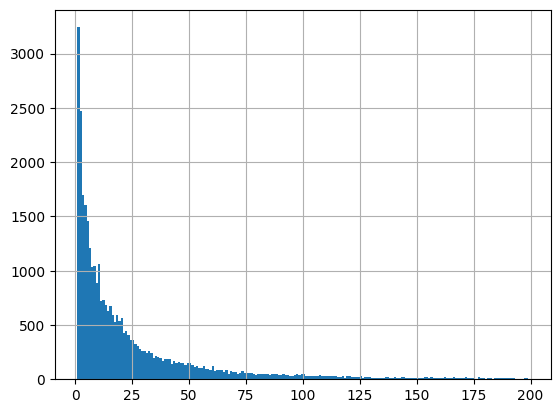

In [37]:
# show dist of sales
df['sales'].hist(bins=np.arange(1, 200, 1))

In [39]:
df['year'] = df['date'].str.split('-').str[0]
df['month'] = df['date'].str.split('-').str[1]

/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_36383/748524684.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g_month_sum_sales = df.groupby(['month']).sum().sort_values('month')


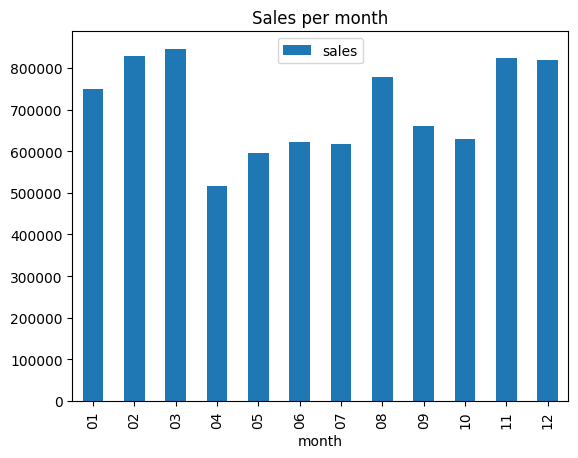

In [47]:
# show all sales per month without year plpt
df_g_month_sum_sales = df.groupby(['month']).sum().sort_values('month')
df_g_month_sum_sales.plot(kind='bar', y='sales')
plt.title('Sales per month')
plt.show()

/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_36383/2856242791.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g_year_sum_sales = df.groupby(['year']).sum().sort_values('year')


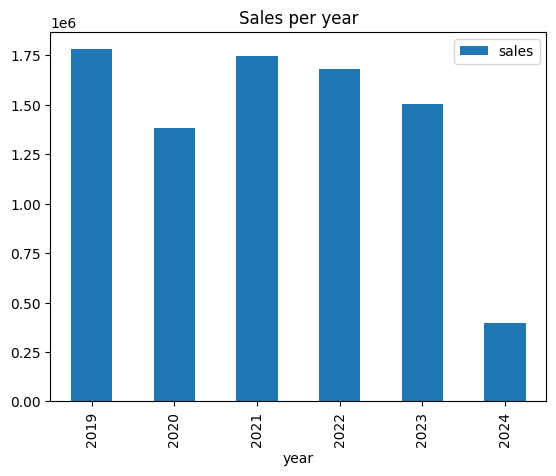

In [48]:
# per year
df_g_year_sum_sales = df.groupby(['year']).sum().sort_values('year')
df_g_year_sum_sales.plot(kind='bar', y='sales')
plt.title('Sales per year')
plt.show()

<Axes: xlabel='date'>

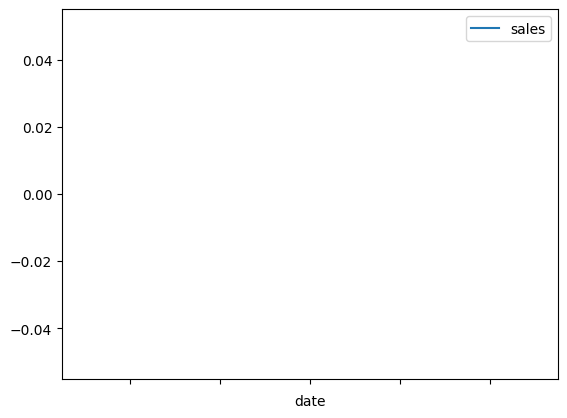

In [52]:
# show top 10 items sold per month in time series plot
top_10_items = df_g_item_sum_sales[df_g_item_sum_sales['sales'] > 0].head(10).index
df[df['item'].isin(top_10_items)].plot(x='date', y='sales', kind='line')
